In [1]:
!pip install tweepy
!pip install vaderSentiment
!pip install python-louvain

In [1]:
import csv
import re
import string
import random

with open('C:/Users/Admin/Downloads/33l dataset/33l dataset/Syncs/Syncs/Sync2_#mumbai.csv', encoding="utf8") as csvfile:
    data = list(csv.reader(csvfile))

list_of_tweets = []
for i in range(1, len(data)):
    
    tweet = data[i][3]

    # remove \n from the end after every sentence
    tweet = tweet.strip('\n')

    # Remove any word that starts with the symbol @
    tweet = " ".join(filter(lambda x: x[0] != '@', tweet.split()))

    # Remove any URL
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"www\S+", "", tweet)

    # remove colons from the end of the sentences (if any) after removing url
    tweet = tweet.strip()
    tweet_len = len(tweet)
    if tweet_len > 0:
        if tweet[len(tweet) - 1] == ':':
            tweet = tweet[:len(tweet) - 1]

    # Remove any hash-tags symbols
    tweet = tweet.replace('#', '')

    # Convert every word to lowercase
    tweet = tweet.lower()

    # remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))

    # trim extra spaces
    tweet = " ".join(tweet.split())

    # convert each tweet from string type to as list<string> using " " as a delimiter
    list_of_tweets.append(tweet.split(' '))
tweets_exp=[]
tweets_abs=[]
if len(list_of_tweets)>500:
    indexes=random.sample(range(1,len(list_of_tweets)),500)
    for i in range(len(indexes)):
        tweets_exp.append(list_of_tweets[indexes[i]])
    for i in range(len(indexes)):
        tweets_abs.append(list_of_tweets[indexes[i]])
else:
    for i in range(len(list_of_tweets)):
        tweets_exp.append(list_of_tweets[i])
    for i in range(len(list_of_tweets)):
        tweets_abs.append(list_of_tweets[i])
    

In [2]:
print('found %d tweets' % len(list_of_tweets))

found 121 tweets


In [3]:
#getting expression words from pwords and nwords file

f = open('C:/Users/Admin/Jaccard_Similarity/Health_Tweets/pwords.txt', "r", encoding="utf8")
pwords = list(f)
    
f = open('C:/Users/Admin/Jaccard_Similarity/Health_Tweets/nwords.txt', "r", encoding="utf8")
nwords = list(f)

for i in range(len(pwords)):
    pwords[i] = pwords[i].strip('\n')
for i in range(len(nwords)):
    nwords[i] = nwords[i].strip('\n')

In [4]:
#removing expression words from tweets
for n,text in enumerate(tweets_abs):  
    ntext = []
    for word in text:
        if word not in pwords and word not in nwords:
            ntext.append(word) 
    tweets_abs[n] = ntext
    
for n,text in enumerate(tweets_exp):  
    ntext = []
    for word in text:
        if word in pwords or word in nwords:
            ntext.append(word) 
    tweets_exp[n] = ntext
    

tweets_abs = [' '.join(i) for i in tweets_abs]
tweets_exp = [' '.join(i) for i in tweets_exp]

In [5]:
tweets_exp

['',
 '',
 '',
 '',
 '',
 '',
 'obsession',
 '',
 '',
 '',
 'passion inspiration',
 '',
 '',
 'gracious',
 '',
 'love',
 '',
 '',
 '',
 'fun',
 '',
 '',
 'crowded like',
 '',
 '',
 '',
 '',
 'welcome',
 '',
 '',
 '',
 '',
 '',
 'inspiration',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'hum',
 '',
 '',
 'ready',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'delicious']

In [6]:
#working on abstraction score(tweets_abs)........................................................................

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer()
sparse_matrix = tfidf_vectorizer.fit_transform(tweets_abs)

doc_term_matrix = sparse_matrix.todense()
df_abs = pd.DataFrame(doc_term_matrix, 
                  columns=tfidf_vectorizer.get_feature_names())
print(doc_term_matrix)
print(cosine_similarity(df_abs))

[[0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.2732112 0.        ... 0.        0.        0.       ]]
[[1.         1.         1.         ... 0.42246238 0.0295001  0.0340762 ]
 [1.         1.         1.         ... 0.42246238 0.0295001  0.0340762 ]
 [1.         1.         1.         ... 0.42246238 0.0295001  0.0340762 ]
 ...
 [0.42246238 0.42246238 0.42246238 ... 1.         0.01783628 0.02060307]
 [0.0295001  0.0295001  0.0295001  ... 0.01783628 1.         0.00690348]
 [0.0340762  0.0340762  0.0340762  ... 0.02060307 0.00690348 1.        ]]


In [8]:
import matplotlib.pyplot as plt
import networkx as nx

Gabs = nx.Graph()

l = len(tweets_abs)
for i in range(l):
    for j in range(i+1, l):
        if cosine_similarity(df_abs)[i][j] != 0:
            print(i, j)
            Gabs.add_edge(str(i), str(j), weight = cosine_similarity(df_abs)[i][j])

e = [(u, v) for (u, v, d) in Gabs.edges(data=True)]
#esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(Gabs)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Gabs, pos, node_size=200)

# edges
nx.draw_networkx_edges(Gabs, pos, edgelist=e,
                       width=.3)
# labels
nx.draw_networkx_labels(Gabs, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1

13 67
13 68
13 69
13 70
13 71
13 72
13 73
13 74
13 75
13 76
13 77
13 78
13 79
13 80
13 81
13 82
13 83
13 84
13 85
13 86
13 87
13 88
13 89
13 90
13 91
13 92
13 93
13 94
13 95
13 96
13 97
13 98
13 99
13 100
13 101
13 102
13 103
13 104
13 105
13 106
13 107
13 108
13 109
13 110
13 111
13 112
13 113
13 114
13 115
13 116
13 117
13 118
13 119
13 120
14 15
14 16
14 17
14 18
14 19
14 20
14 21
14 22
14 23
14 24
14 25
14 26
14 27
14 28
14 29
14 30
14 31
14 32
14 33
14 34
14 35
14 36
14 37
14 38
14 39
14 40
14 41
14 42
14 43
14 44
14 45
14 46
14 47
14 48
14 49
14 50
14 51
14 52
14 53
14 54
14 55
14 56
14 57
14 58
14 59
14 60
14 61
14 62
14 63
14 64
14 65
14 66
14 67
14 68
14 69
14 70
14 71
14 72
14 73
14 74
14 75
14 76
14 77
14 78
14 79
14 80
14 81
14 82
14 83
14 84
14 85
14 86
14 87
14 88
14 89
14 90
14 91
14 92
14 93
14 94
14 95
14 96
14 97
14 98
14 99
14 100
14 101
14 102
14 103
14 104
14 105
14 106
14 107
14 108
14 109
14 110
14 111
14 112
14 113
14 114
14 115
14 116
14 117
14 118
14 119
14 12

26 100
26 101
26 102
26 103
26 104
26 105
26 106
26 107
26 108
26 109
26 110
26 111
26 112
26 113
26 114
26 115
26 116
26 117
26 118
26 119
26 120
27 28
27 29
27 30
27 31
27 32
27 33
27 34
27 35
27 36
27 37
27 38
27 39
27 40
27 41
27 42
27 43
27 44
27 45
27 46
27 47
27 48
27 49
27 50
27 51
27 52
27 53
27 54
27 55
27 56
27 57
27 58
27 59
27 60
27 61
27 62
27 63
27 64
27 65
27 66
27 67
27 68
27 69
27 70
27 71
27 72
27 73
27 74
27 75
27 76
27 77
27 78
27 79
27 80
27 81
27 82
27 83
27 84
27 85
27 86
27 87
27 88
27 89
27 90
27 91
27 92
27 93
27 94
27 95
27 96
27 97
27 98
27 99
27 100
27 101
27 102
27 103
27 104
27 105
27 106
27 107
27 108
27 109
27 110
27 111
27 112
27 113
27 114
27 115
27 116
27 117
27 118
27 119
27 120
28 29
28 30
28 31
28 32
28 33
28 34
28 35
28 36
28 37
28 38
28 39
28 40
28 41
28 42
28 43
28 44
28 45
28 46
28 47
28 48
28 49
28 50
28 51
28 52
28 53
28 54
28 55
28 56
28 57
28 58
28 59
28 60
28 61
28 62
28 63
28 64
28 65
28 66
28 67
28 68
28 69
28 70
28 71
28 72
28 73
28 7

42 78
42 79
42 80
42 81
42 82
42 83
42 84
42 85
42 86
42 87
42 88
42 89
42 90
42 91
42 92
42 93
42 94
42 95
42 96
42 97
42 98
42 99
42 100
42 101
42 102
42 103
42 104
42 105
42 106
42 107
42 108
42 109
42 110
42 111
42 112
42 113
42 114
42 115
42 116
42 117
42 118
42 119
42 120
43 44
43 45
43 46
43 47
43 48
43 49
43 50
43 51
43 52
43 53
43 54
43 55
43 56
43 57
43 58
43 59
43 60
43 61
43 62
43 63
43 64
43 65
43 66
43 67
43 68
43 69
43 70
43 71
43 72
43 73
43 74
43 75
43 76
43 77
43 78
43 79
43 80
43 81
43 82
43 83
43 84
43 85
43 86
43 87
43 88
43 89
43 90
43 91
43 92
43 93
43 94
43 95
43 96
43 97
43 98
43 99
43 100
43 101
43 102
43 103
43 104
43 105
43 106
43 107
43 108
43 109
43 110
43 111
43 112
43 113
43 114
43 115
43 116
43 117
43 118
43 119
43 120
44 45
44 46
44 47
44 48
44 49
44 50
44 51
44 52
44 53
44 54
44 55
44 56
44 57
44 58
44 59
44 60
44 61
44 62
44 63
44 64
44 65
44 66
44 67
44 68
44 69
44 70
44 71
44 72
44 73
44 74
44 75
44 76
44 77
44 78
44 79
44 80
44 81
44 82
44 83
44 8

61 114
61 115
61 116
61 117
61 118
61 119
61 120
62 63
62 64
62 65
62 66
62 67
62 68
62 69
62 70
62 71
62 72
62 73
62 74
62 75
62 76
62 77
62 78
62 79
62 80
62 81
62 82
62 83
62 84
62 85
62 86
62 87
62 88
62 89
62 90
62 91
62 92
62 93
62 94
62 95
62 96
62 97
62 98
62 99
62 100
62 101
62 102
62 103
62 104
62 105
62 106
62 107
62 108
62 109
62 110
62 111
62 112
62 113
62 114
62 115
62 116
62 117
62 118
62 119
62 120
63 64
63 65
63 66
63 67
63 68
63 69
63 70
63 71
63 72
63 73
63 74
63 75
63 76
63 77
63 78
63 79
63 80
63 81
63 82
63 83
63 84
63 85
63 86
63 87
63 88
63 89
63 90
63 91
63 92
63 93
63 94
63 95
63 96
63 97
63 98
63 99
63 100
63 101
63 102
63 103
63 104
63 105
63 106
63 107
63 108
63 109
63 110
63 111
63 112
63 113
63 114
63 115
63 116
63 117
63 118
63 119
63 120
64 65
64 66
64 67
64 68
64 69
64 70
64 71
64 72
64 73
64 74
64 75
64 76
64 77
64 78
64 79
64 80
64 81
64 82
64 83
64 84
64 85
64 86
64 87
64 88
64 89
64 90
64 91
64 92
64 93
64 94
64 95
64 96
64 97
64 98
64 99
64 100
64

91 92
91 93
91 94
91 95
91 96
91 97
91 98
91 99
91 100
91 101
91 102
91 103
91 104
91 105
91 106
91 107
91 108
91 109
91 110
91 111
91 112
91 113
91 114
91 115
91 116
91 117
91 118
91 119
91 120
92 93
92 94
92 95
92 96
92 97
92 98
92 99
92 100
92 101
92 102
92 103
92 104
92 105
92 106
92 107
92 108
92 109
92 110
92 111
92 112
92 113
92 114
92 115
92 116
92 117
92 118
92 119
92 120
93 94
93 95
93 96
93 97
93 98
93 99
93 100
93 101
93 102
93 103
93 104
93 105
93 106
93 107
93 108
93 109
93 110
93 111
93 112
93 113
93 114
93 115
93 116
93 117
93 118
93 119
93 120
94 95
94 96
94 97
94 98
94 99
94 100
94 101
94 102
94 103
94 104
94 105
94 106
94 107
94 108
94 109
94 110
94 111
94 112
94 113
94 114
94 115
94 116
94 117
94 118
94 119
94 120
95 96
95 97
95 98
95 99
95 100
95 101
95 102
95 103
95 104
95 105
95 106
95 107
95 108
95 109
95 110
95 111
95 112
95 113
95 114
95 115
95 116
95 117
95 118
95 119
95 120
96 97
96 98
96 99
96 100
96 101
96 102
96 103
96 104
96 105
96 106
96 107
96 108
96 1

C:\Users\Admin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


<Figure size 640x480 with 1 Axes>

In [9]:
vabs = Gabs.number_of_nodes()
Gabs.number_of_edges()

7260

In [10]:
#working on expression score(tweets_exp).....................................................................

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer()
sparse_matrix = tfidf_vectorizer.fit_transform(tweets_exp)

doc_term_matrix = sparse_matrix.todense()
df_exp = pd.DataFrame(doc_term_matrix, 
                  columns=tfidf_vectorizer.get_feature_names())

from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df_exp))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


10 33


C:\Users\Admin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


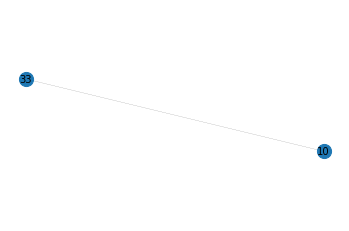

In [12]:
import matplotlib.pyplot as plt
import networkx as nx

Gexp = nx.Graph()

l = len(tweets_exp)
for i in range(l):
    for j in range(i+1, l):
        if cosine_similarity(df_exp)[i][j] != 0:
            print(i, j)
            Gexp.add_edge(str(i), str(j), weight = cosine_similarity(df_exp)[i][j])
#         sc = abs(score[i] - score[j])
        #if  sc != 0:
#         Gexp.add_edge(str(i), str(j), weight = sc)

e = [(u, v) for (u, v, d) in Gexp.edges(data=True)]

pos = nx.spring_layout(Gexp)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(Gexp, pos, node_size=200)

# edges
nx.draw_networkx_edges(Gexp, pos, edgelist=e,
                       width=.1)
# labels
nx.draw_networkx_labels(Gexp, pos, font_size=10, font_family='sans-serif')

plt.axis('off')
plt.show()

In [13]:
vexp = Gexp.number_of_nodes()
Gexp.number_of_edges()

1

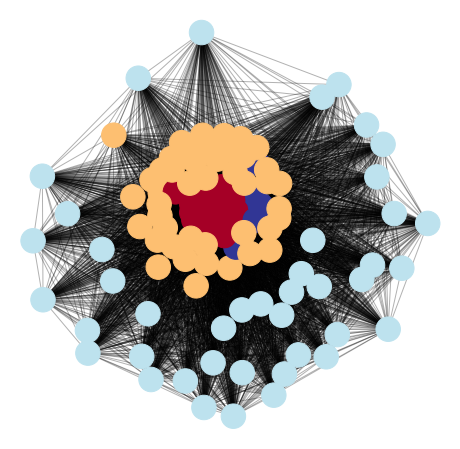

In [14]:
#plot of abstraction graph
import community
partitiona = community.best_partition(Gabs)
posa = nx.spring_layout(Gabs)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(Gabs, posa, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partitiona.values()))
nx.draw_networkx_edges(Gabs, posa, alpha=0.3)
plt.show(Gabs)

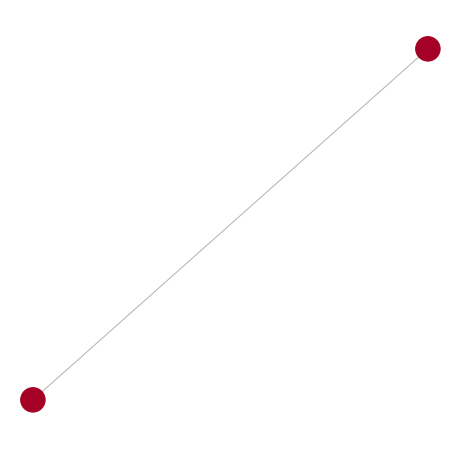

In [15]:
#plot of expression graph
import community
partitionb = community.best_partition(Gexp)
posb = nx.spring_layout(Gexp)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(Gexp, posb, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partitionb.values()))
nx.draw_networkx_edges(Gexp, posb, alpha=0.3)
plt.show(Gexp)

In [16]:
from collections import Counter
count_abs = Counter(partitiona.values())
count_exp = Counter(partitionb.values())
print("clusters in abstraction graph: ", count_abs)
print("clusters in expression graph: ", count_exp)

clusters in abstraction graph:  Counter({1: 45, 2: 42, 0: 29, 3: 5})
clusters in expression graph:  Counter({0: 2})


In [17]:
m_abs = max(count_abs, key=count_abs.get)
m_exp = max(count_exp, key=count_exp.get)
v_abs = count_abs[m_abs]
v_exp = count_exp[m_exp]

In [18]:
abs_score = float(v_abs/len(list_of_tweets))
abs_score

0.371900826446281

In [19]:
exp_score = float(v_exp/len(list_of_tweets))
exp_score

0.01652892561983471

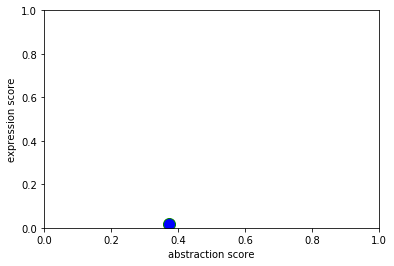

In [20]:
import matplotlib.pyplot as plt

plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('abstraction score') 
# naming the y axis 
plt.ylabel('expression score') 
plt.plot(abs_score, exp_score, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
plt.show()